## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

df = pd.read_csv('./assets/real_estate.csv', delimiter=';', error_bad_lines=False)
print(df.info())
print(df.columns)

/tmp/ipykernel_1041/553850311.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./assets/real_estate.csv', delimiter=';', error_bad_lines=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv('./assets/real_estate.csv', delimiter=';')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [2]:
pd.options.display.max_columns = None
#df['date'] = df['date'].astype('datetime64')
df['date'] = pd.to_datetime(df['date'])
df.describe()
df.describe(datetime_is_numeric=True)
#print(df.columns)
#print(df.head(10))

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,0.0,0.0
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,NaN,NaN
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,NaN,NaN
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,NaN


In [3]:
df.head(10)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28 18:27:15.997502700+00:00,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
5,6,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,2019-12-28 18:27:15.968054700+00:00,"Parquerozas, bajo con jardín de diseño, totalm...",Las Rozas de Madrid,España,Madrid,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Galea,NaN,El Pinar - Punta Galea,0,0,0,0,0,0,0,0,0,0,"40,53391","-3,89445",NaN,NaN
6,7,153848236,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,145.0,430000,2019-12-28 18:27:15.968054700+00:00,"Európolis, estupendo ático de 145 m construido...",Las Rozas de Madrid,España,Madrid,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,Europolis,NaN,Europolis,0,0,0,0,0,0,0,0,0,0,"40,5105842135624","-3,89436578643763",NaN,NaN
7,8,153482331,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,95.0,275000,2019-12-28 18:27:15.968054700+00:00,"Parquerozas, estupendo bajo con jardín de 65 m...",Las Rozas de Madrid,España,Madrid,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Galea,NaN,El Pinar - Punta Galea,0,0,0,0,0,0,0,0,0,0,"40,53294","-3,89898",NaN,NaN
8,9,153885351,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,3.0,277.0,445000,2019-12-28 18:27:15.968054700+00:00,"Las Rozas, Punta Galea, precioso chalet adosad...",Las Rozas de Madrid,España,Madrid,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Ga

#### What is the most expensive home in the dataset? (★☆☆)

In [37]:
max_price =df['price'].max()
print("Max Price: \n",max_price)
max_price2 =df['price'].where(df['price']>0).max()
print("Max Price not 0: \n",max_price2)
max_price_index =df['price'].where(df['price']>0).idxmax()
print("\nMax Price index: \n",max_price_index)
max_price_row =df.loc[max_price_index]
print("Min Price Row: \n",max_price_row)

Max Price: 
 8500000
Max Price not 0: 
 8500000.0

Max Price index: 
 13110
Min Price Row: 
 Unnamed: 0                                                      13111
id_realEstates                                              132042636
isNew                                                           False
realEstate_name                            engel volkers torrelodones
phone_realEstate                                          911798512.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/vi...
rooms                                                            19.0
bathrooms                                                         NaN
surface                                                           NaN
price                                                         8500000
date                                        2019-12-19 12:29:00+00:00
description         El Palacio de El Enebral, la finca fue propied...
address                                                   El Escori

#### What is cheapest home in the dataset? (★☆☆)

In [35]:
#print(df.head(5))
min_price =df['price'].min()
print("Min Price: \n",min_price)
min_price2 =df['price'].where(df['price']>0).min()
print("Min Price not 0: \n",min_price2)
#min_price_index =df['price'].idxmin()
#print("\nMin Price index: \n",min_price_index)
#min_price_row =df.loc[min_price_index]
#print("Min Price Row: \n",min_price_row)
min_price_index =df['price'].where(df['price']>0).idxmin()
print("\nMin Price index: \n",min_price_index)
min_price_row =df.loc[min_price_index]
print("Min Price Row: \n",min_price_row)


Min Price: 
 0
Min Price2: 
 600.0

Min Price index: 
 7491
Min Price Row: 
 Unnamed: 0                                                       7492
id_realEstates                                              153977752
isNew                                                           False
realEstate_name                                       redpiso coslada
phone_realEstate                                          910759552.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms                                                             3.0
bathrooms                                                         1.0
surface                                                          80.0
price                                                             600
date                                        2019-12-24 12:56:00+00:00
description         REDPISO COSLADA alquila vivienda en Ciudad 70,...
address                                               Berlin, Coslada
country      

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [44]:
# Biggest
max_surface =df['surface'].max()
print("\nMax surface: \n",max_surface)
max_surface_index =df['surface'].where(df['surface']>0).idxmax()
print("\nMax surface index: \n",max_surface_index)
#max_surface_row =df.loc[max_surface_index]
#print("Max surface Row: \n",max_surface_row)


Max surface: 
 249000.0

Max surface index: 
 6794


In [45]:
# Smaller
min_surface =df['surface'].min()
print("\nMin surface: \n",min_surface)
min_surface =df['surface'].where(df['surface']>0).min()
print("\nMin surface: \n",min_surface)
min_surface_index =df['surface'].where(df['surface']>0).idxmin()
print("\nMin surface index: \n",min_surface_index)
#min_surface_row =df.loc[min_surface_index]
#print("Min surface Row: \n",min_surface_row)


Min surface: 
 15.0

Min surface: 
 15.0

Min surface index: 
 498


#### How many populations (level5) the dataset contains? (★☆☆)

In [58]:
df.head(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28 18:27:15.997502700+00:00,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [63]:
df.isna().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

In [67]:
print("Count of NaN:\n",df['level5'].isna().sum())
print("Count of Not NaN:\n",df['level5'].notna().sum())
# Count number of rows exclude NaN values
population = df['level5'].count()
print("Population count() this option exclude NaN if exist: ", population)
population = df['level5'].size
#If a Serie, if a DF, the size is row*cols
print("Population size() if a Serie: ", population)


Count of NaN:
 0
Count of Not NaN:
 15335
Population count() this option exclude NaN if exist:  15335
Population size() if a Serie:  15335


#### Does the dataset contain NAs? (★☆☆)


In [71]:
print("Count of NaN:\n",df.isna().sum())
#print("Count of Not NaN:\n",df.notna().sum())


Count of NaN:
 Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64


#### Delete the NAs of the dataset, if applicable (★★☆)

In [96]:
import numpy as np
import pandas as pd

df_to_del = pd.read_csv('./assets/real_estate.csv', delimiter=';')
#print("Count of NaN:\n",df_to_del.isna().sum())
df_to_del.dropna(axis=1,inplace=True)
#df_to_del.fillna("EMPTY", inplace=True)
print("Count of NaN:\n",df_to_del.isna().sum())
#print("Count of NaN:\n",df_to_del.notna().sum())


Count of NaN:
 Unnamed: 0        15335
id_realEstates    15335
isNew             15335
url_inmueble      15335
price             15335
date              15335
address           15335
country           15335
level1            15335
level2            15335
level3            15335
level5            15335
upperLevel        15335
countryId         15335
level1Id          15335
level2Id          15335
level3Id          15335
level4Id          15335
level5Id          15335
level6Id          15335
level7Id          15335
level8Id          15335
accuracy          15335
latitude          15335
longitude         15335
dtype: int64


In [93]:
df_to_del.tail(10)

,Unnamed: 0,id_realEstates,isNew,url_inmueble,price,date,address,country,level1,level2,level3,level5,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
15325,15326,153901467,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,215000,2019-12-17T18:24:00Z,"Calle de Luis Sauquillo, 77, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,Fuenlabrada,El Arroyo - La Fuente,0,0,0,0,0,0,0,0,0,1,"40,28062","-3,79869"
15326,15327,153901401,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,184000,2019-12-17T18:22:00Z,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",Madrid Capital,Águilas,0,0,0,0,0,0,0,0,0,0,"40,3798763","-3,7714352"
15327,15328,153901411,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,150000,2019-12-17T18:21:00Z,El Escorial,España,Madrid,Madrid,Zona Noroeste,El Escorial,Navalquejigo - Los Arroyos,0,0,0,0,0,0,0,0,0,0,"40,60074","-4,06255"
15328,15329,153901441,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,229000,2019-12-17T18:21:00Z,"Calle de Manuela Malasaña, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",Madrid Capital,Universidad - Malasaña,0,0,0,0,0,0,0,0,0,0,"40,42844","-3,70414"
15329,15330,153901392,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,264500,2019-12-17T18:19:00Z,"Calle Luis Carrillo de Toledo, 3, Pinto",España,Madrid,Madrid,Zona Sur de Madrid,Pinto,San José - Buenos Aires,0,0,0,0,0,0,0,0,0,1,"40,24007","-3,70606"
15330,15331,153901377,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,259470,2019-12-17T18:19:00Z,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",Madrid Capital,Berruguete,0,0,0,0,0,0,0,0,0,0,"40,45416","-3,70286"
15331,15332,150394373,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,165000,2019-12-17T18:19:00Z,Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,Velilla de San Antonio,Velilla de San Antonio,0,0,0,0,0,0,0,0,0,0,"40,36652","-3,48951"
15332,15333,153901397,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,495000,2019-12-17T18:19:00Z,Torrelodones,España,Madrid,Madrid,Zona Noroeste,Torrelodones,Casco Antiguo,0,0,0,0,0,0,0,0,0,0,"40,57444","-3,92124"
15333,15334,152607440,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,195000,2019-12-17T18:18:00Z,Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,Velilla de San Antonio,Velilla de San Antonio,0,0,0,0,0,0,0,0,0,0,"40,36967","-3,48105"
15334,15335,153901356,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,765000,2019-12-17T18:17:00Z,"Paseo de la Castellana, Madrid Capital",España,Madrid,Madrid,"Madrid, Zona de",Madrid Capital,Castillejos - Cuzco,0,0,0,0,0,0,0,0,0,0,"40,45773","-3,69068"


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [98]:
#mean_count = df[df['level5'] == "Arroyomolinos (Madrid)"].mean()
mean_count =df['price'].where(df['level5']=="Arroyomolinos (Madrid)").mean()
print("Mean price of Arroyomolinos (Madrid): ", mean_count)

Mean price of Arroyomolinos (Madrid):  294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

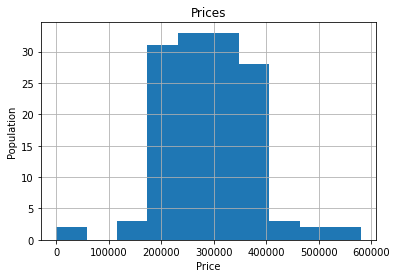

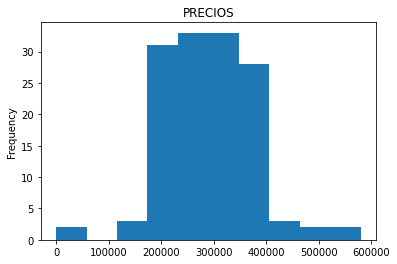

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('./assets/real_estate.csv', delimiter=';')

data_filter = df[df['level5'] == "Arroyomolinos (Madrid)"]
data_filter
data_filter['price'].hist()

plt.title('Prices')
plt.xlabel('Price')
plt.ylabel('Population')
plt.show()

# Another way
data_filter = df.where(df['level5']=="Arroyomolinos (Madrid)")
data_filter['price'].plot(kind='hist', title='PRECIOS')
plt.show()


#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

#### Make a bar plot of the median of prices (★★★) 

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

#### What is the most expensive home of each population? (★★☆) 

In [33]:
column = df["price"]
max_index = column.idxmax()
print(f"The id of the most expensive house is {max_index}")

The id of the most expensive house is 13110


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

#### What happens if we do the same analysis for price/m2 (★★☆) 

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

#### How many  real estate agencies the dataset contains? (★★☆) 

#### What is the population (level 5) that contains the most houses? (★★☆) 